In [ ]:
!pip install -q oauth2client==1.5.2
import sys
sys.path.append("./utils/student_function/")

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

vamos a implementar una matriz dispersa con una estructura de datos que nos permita realizar operaciones más eficientes. Representaremos una matriz como un **diccionario de diccionarios**. Es decir, usaremos un diccionario que, por cada fila, mantenga a su vez un diccionario indexado por columnas de valores de esa fila.

## Ejercicio 1.

Completa la función siguiente para que el diccionario `d` opere como un diccionario de diccionarios. Es decir, que cada `key1` del diccionario sea a su vez un diccionario de forma que al añadir un `item` con una `key2`  concreta:

1. si `d` no tiene ningún elemento en esa `key1` se cree un nuevo elemento con una diccionario vacío
1. se añada el `item` al diccionario referenciado con `d[key1][key2]`

observa que, dado un diccionario `d`:

- `d.keys()` devuelve la lista de claves
- `key in d.keys()` devuelve `True` si el diccionario ya contiente la clave `key` 

Ejemplo de ejecución:

    > d = {}
    > st.add_to_dict(d, 10, 3,  "20")
    > st.add_to_dict(d, 1, 5,  "4")
    > st.add_to_dict(d, 1, 2, "14")
    > print d
    > print d[1][5]

    {1: {2: '14', 5: '4'}, 10: {3: '20'}}
    4

In [ ]:
%%writefile ./utils/student_function/PS03_01.py
def add_to_dict(d, key1, key2, val):
    
    <... TU CODIGO AQUI ...>
    return d

comprueba manualmente tu código

In [ ]:
import PS03_01 as st
import importlib; importlib.reload(st)
d = {}
st.add_to_dict(d, 10, 3,  "20")
st.add_to_dict(d, 1, 5,  "4")
st.add_to_dict(d, 1, 2, "14")
print(d)

observa que si los índices son números de files y columnas, accedemos a un elemento con una notación _matricial_ muy limpia

In [ ]:
print(d[1][5])

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS03_01

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS03_01

## Ejercicio 2

implementa el constructor de la siguiente clase y el método `sparseness_metric`

Observa que el constructor deberá:

- establecer el valor de `self.shape` al tamaño de la matrix `m`. Si `m` es `None` el tamaño ha de ser `(0,0)`
- rellenar el diccionario `self.rows` como un diccionario de diccionarios con los valores de `m` que sean distintos de 0. Tendrás que recorrer toda la matriz `m` para esto.

Ejemplo de ejecución:

    > m = array([[1, 0, 9],
    >       [0, 0, 7],
    >       [3, 5, 0],
    >       [5, 0, 0],
    >       [0, 3, 0]])
    >
    > s = st.SparseMatrix(m)
    > print "rows", s.rows
    > print "length of each row", [len(s.rows[i]) for i in s.rows.keys()]
    > print "sparseness metric", s.sparseness_metric()

    rows {0: {0: 1, 2: 9}, 1: {2: 7}, 2: {0: 3, 1: 5}, 3: {0: 5}, 4: {1: 3}}
    length of each row [2, 1, 2, 1, 1]
    sparseness metric 0.3333333

In [ ]:
%%writefile ./utils/student_function/PS03_02.py
import itertools

def add_to_dict(d, key1, key2, val):
    <... TU CODIGO AQUI ...>
    return d

class SparseMatrix:
    
    def __init__(self, m=None):
        self.rows = {}
        self.shape =  ... 
        <... TU CODIGO AQUI ...>
                           
    def sparseness_metric(self):
        metric = <... TU CODIGO AQUI ...>
        return metric
        

comprueba manualmente tu código

In [ ]:
import PS03_02 as st
import importlib; importlib.reload(st)

import numpy as np

def random_sparse_matrix(size):
    m = np.random.randint(2, size=size)
    m = m * np.random.randint(10,size=size)
    return m
m = random_sparse_matrix((5,3))
print(m.shape, st.SparseMatrix(m).sparseness_metric())
m

In [ ]:
s = st.SparseMatrix(None)
s.shape

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS03_02

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS03_02

## Ejercicio 3

implementa el método `to_dense` y el método `T` (por transpuesta). 

- `to_dense`: debe de devolver una matriz `numpy` equivalente a la propia matriz dispersa
- `T` ha de devolver una matriz dispersa nueva (una instancia nueva de la misma clase) con los índices de `self.rows` invertidos.

In [ ]:
%%writefile ./utils/student_function/PS03_03.py
import itertools
import numpy as np

def add_to_dict(d, key1, key2, val):
    <... TU CODIGO AQUI ...>
    return d

class SparseMatrix:
    
    def __init__(self, m=None):
        <... TU CODIGO AQUI ...>
                           
    def to_dense(self):
        r = np.zeros(self.shape)
        <... TU CODIGO AQUI ...>
        return r
    
    def T(self):
        r = self.__class__()
        <... TU CODIGO AQUI ...>
        return r

comprueba manualmente tu código

In [ ]:
import PS03_03 as st
import importlib
importlib.reload(st)

def random_sparse_matrix(size):
    m = np.random.randint(2, size=size)
    m = m * np.random.randint(10,size=size)
    return m

m = random_sparse_matrix((5,3))
s = st.SparseMatrix(m)
print(m)

In [ ]:
print(m.T)

In [ ]:
print(s.T().to_dense().astype(int))

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS03_03

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS03_03

## Ejercicio 4

Implementa el método `__getitem__` para que devuelva un elemento de la matriz dispersa con la misma notación que una matriz `numpy`. Ten en cuanta que:

- si `i` o `j` están fuera del tamaño de la matriz has de emitir un `AssertionError`
- si el elemento `(i,j)` existe en el diccionario interno (`self.rows`) se ha de devolver el valor almacenado
- si no existe, se ha de devolver el valor 0

In [ ]:
%%writefile ./utils/student_function/PS03_04.py
import itertools

def add_to_dict(d, key1, key2, val):
    <... TU CODIGO AQUI ...>
    return d

class SparseMatrix:
    
    def __init__(self, m=None):
        <... TU CODIGO AQUI ...>
    
    def __getitem__(self, pos):
        i,j = pos
        assert <... TU CODIGO AQUI ...>
        return <... TU CODIGO AQUI ...>



comprueba tu código manualmente

In [ ]:
import PS03_04 as st
import importlib
importlib.reload(st)

def random_sparse_matrix(size):
    m = np.random.randint(2, size=size)
    m = m * np.random.randint(10,size=size)
    return m

m = random_sparse_matrix((5,3))
print("original matrix shape", m.shape)
print(m)

In [ ]:
import itertools
s = st.SparseMatrix(m)
print("inner dict", s.rows)
print("\ncoord   value_in_m       value_in_s")
for i,j in itertools.product(list(range(m.shape[0])), list(range(m.shape[1]))):                
    print("(%d,%d)   %5d        %5d"%(i,j, m[i,j], s[i,j]))

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS03_04

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS03_04

## Ejercicio 5

Implementa el método `__setitem__` de forma que:

- si el valor del elemento es 0, no se haga nada
- si las coordenadas `i,j` exceden el tamaño actual de la matriz, se inserte el elemento, pero que se actualice el tamaño (`self.shape`) de manera acorde.


In [ ]:
%%writefile ./utils/student_function/PS03_05.py
import itertools 
import numpy as np

def add_to_dict(d, key1, key2, val):
    <... TU CODIGO AQUI ...>

class SparseMatrix:
    
    def __init__(self, m=None):
        <... TU CODIGO AQUI ...>
    
    def __setitem__(self, pos, val):
        i,j = pos
        <... TU CODIGO AQUI ...>

    def __getitem__(self, pos):
        i,j = pos
        <... TU CODIGO AQUI ...>

    def to_dense(self):
        <... TU CODIGO AQUI ...>


comprueba manualmente tu código

In [ ]:
import PS03_05 as st
import importlib
importlib.reload(st)

def random_sparse_matrix(size):
    m = np.random.randint(2, size=size)
    m = m * np.random.randint(10,size=size)
    return m

m = random_sparse_matrix((5,3))
s = st.SparseMatrix(m)
print("initial")
print(s.rows)
print(s.to_dense().astype(int))
s[4,2] = m[4,2]*2+3
print("\nafter __setitem__")
print(s.rows)
print(s.to_dense().astype(int))

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS03_05

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS03_05

## Ejercicio 6

Implementa el método `__add__`

Sugerencia de implementación: 

1. verifique con un `assert` que ambas matrices son del mismo tamaño
1. crea una nueva matriz vacía
1. copie `self.shape` en el `shape` de la matriz nueva 
1. recorra todos los elementos de `self.rows` y llame al `__setitem__` de la matriz nueva por cada uno de ellos
1. recorra todos los elementos de `q` y haga un get/set sobre la nueva matriz para añadirlos


In [ ]:
%%writefile ./utils/student_function/PS03_06.py
import itertools 
import numpy as np
def add_to_dict(d, key1, key2, val):
    <... TU CODIGO AQUI ...>

class SparseMatrix:
    
    def __init__(self, m=None):
        <... TU CODIGO AQUI ...>

    def to_dense(self):
        <... TU CODIGO AQUI ...>
       
    def __setitem__(self, pos, val):
        i,j = pos
        <... TU CODIGO AQUI ...>

    def __getitem__(self, pos):
        i,j = pos
        <... TU CODIGO AQUI ...>
        
    def __add__ (self, q):
        assert <... TU CODIGO AQUI ...>

        r = self.__class__()
        <... TU CODIGO AQUI ...>
        return r

In [ ]:
import PS03_06 as st
import importlib
importlib.reload(st)
m1, m2 = random_sparse_matrix((5,3)), random_sparse_matrix((5,3))
sm1 = st.SparseMatrix(m1)
sm2 = st.SparseMatrix(m2)
print(sm1.to_dense().astype(int))
print("--")
print(sm2.to_dense().astype(int))

In [ ]:
print((sm1+sm2).to_dense().astype(int))

In [ ]:
print(m1+m2)

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS03_06

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS03_06

## Ejercicio 7

Implementa `dot` en nuestra clase de matrices dispersas representadas con un diccionario de diccionarios.

In [ ]:
%%writefile ./utils/student_function/PS03_07.py

import itertools
import numpy as np
def add_to_dict(d, key1, key2, val):
    <... TU CODIGO AQUI ...>

class SparseMatrix:
    
    def __init__(self, m=None):
        <... TU CODIGO AQUI ...>

    def to_dense(self):
        <... TU CODIGO AQUI ...>
                        
    def __setitem__(self, pos, val):
        i,j = pos
        <... TU CODIGO AQUI ...>

    def __getitem__(self, pos):
        i,j = pos
        <... TU CODIGO AQUI ...>
        
    def __add__ (self, q):
        <... TU CODIGO AQUI ...>
            
    def dot(self, q):
        r = self.__class__()
        <... TU CODIGO AQUI ...>
        return r
    
    def sparseness_metric(self):
        <... TU CODIGO AQUI ...>
    
    def T(self):
        <... TU CODIGO AQUI ...>


comprueba tu código manualmente 

In [ ]:
import PS03_07 as st
import importlib
importlib.reload(st)
import numpy as np
m1 = np.random.randint(10, size=(3,2))
print(m1)
m2 = np.random.randint(10, size=(2,3))
print(m2)
print("-- ")
print(m1.dot(m2))
print(st.SparseMatrix(m1).dot(st.SparseMatrix(m2)).to_dense().astype(int))
print("--")
print(m2.dot(m1))
print(st.SparseMatrix(m2).dot(st.SparseMatrix(m1)).to_dense().astype(int))

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS03_07

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS03_07

## Ejercicio 8

Realiza un algoritmo que devuelva el valor máximo de cada fila. Deberá de devolver una lista de tuplas `(row_nb, max_value)` solamente de las filas que contengan algún elemento. P.ej. de la siguiente matriz:

    [[4 0 0 0]
     [0 2 0 5]
     [0 2 0 0]
     [0 0 0 0]
     [0 6 0 0]
     [0 0 0 0]
     [0 0 0 6]
     [0 0 7 7]
     [0 0 2 7]
     [4 8 0 2]]
     
debe de devolver:

     [(0, 4), (1, 5), (2, 2), (4, 6), (6, 6), (7, 7), (8, 7), (9, 8)]

Este ejercicio debe de funcionar **con `SparseMatrix` de tu solución del ejercicio 3 anterior**


In [ ]:
%%writefile ./utils/student_function/PS03_08.py
import numpy as np
def max_per_row(m):
    return <... TU CODIGO AQUI ...>
    

In [81]:
import PS03_08 as st
import PS03_03 as st3
import importlib
importlib.reload(st)
m = random_sparse_matrix((10,4))
s = st3.SparseMatrix(m)
print(m)
print(st.max_per_row(s))

[[0 0 3 2]
 [8 3 9 4]
 [0 0 5 0]
 [0 0 0 0]
 [0 7 8 1]
 [9 0 0 5]
 [8 0 0 0]
 [0 0 0 0]
 [6 0 2 6]
 [0 0 0 0]]
[(0, 3), (1, 9), (2, 5), (4, 8), (5, 9), (6, 8), (8, 6)]


In [82]:
mm = m.max(axis=1)
w = np.argwhere(mm!=0)[:,0]
np.allclose(np.r_[[(i,j) for i,j in zip(w, mm[w])]], np.r_[st.max_per_row(s)])

True

#### comprueba tu código con el corrector automático

In [84]:
!./run CHECK_SOLUTION PS03_08

checking your code with 100 random calls
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [85]:
!./run SUBMIT_SOLUTION PS03_08

connecting ... registering submission for raul.ramos@landing.ai ...
no config found for section PS03, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1gvEfuaCpIp91ilcJENH3q912XUblyo7uSFDYimsoaZs
checking your code with 100 random calls
** CORRECTO **
----
evaluation result 5.0 , submission registered


## Ejercicio 9

Realiza un algoritmo que devuelva el valor máximo de cada columna. Deberá de devolver una lista de tuplas `(col_nb, max_value)` solamente de las columnas que contengan algún elemento. P.ej. de la siguiente matriz:

        [[0 0 2 0 0 1 0 0 0 1]
         [5 3 0 4 0 0 0 5 0 2]
         [9 0 0 4 0 0 0 0 0 0]]
 
 
deberá devolver el siguiente resultado:

        [(0, 9), (1, 3), (2, 2), (3, 4), (5, 1), (7, 5), (9, 2)]
        
 Este ejercicio debe de funcionar **con `SparseMatrix` de tu solución del ejercicio 3 anterior**


In [ ]:
%%writefile ./utils/student_function/PS03_09.py
import numpy as np
def max_per_col(m):
    return <... TU CODIGO AQUI ...>
    

In [87]:
import PS03_09 as st
import PS03_03 as st3
import importlib
importlib.reload(st)
m = st3.SparseMatrix(random_sparse_matrix((3,10)))
print(m.to_dense().astype(int))
print(st.max_per_col(m))

[[1 7 9 0 8 0 0 5 0 0]
 [0 8 5 0 0 0 7 6 0 0]
 [0 7 1 8 0 0 2 0 4 0]]
[(0, 1), (1, 8), (2, 9), (4, 8), (7, 6), (6, 7), (3, 8), (8, 4)]


#### comprueba tu código con el corrector automático

In [89]:
!./run CHECK_SOLUTION PS03_09

checking your code with 100 random calls
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [90]:
!./run SUBMIT_SOLUTION PS03_09

connecting ... session expired, please run the first cell to authenticate with your google account again
user not authenticated, please run the first cell of this notebook to authenticate


## Análisis de complejidad computacional

ya acabaste el taller. Ahora si quieres, puedes jugar con tus soluciones y ejecutar las siguientes celdas para medir experimentalmente la complejidad computacional de tus soluciones. Compárala con la de la implementación de las notas.

In [94]:
import PS03_07 as st7
import importlib
importlib.reload(st)
def xrandom_sparse_matrix(max_rows, max_cols, n_items):
    m = st7.SparseMatrix()
    for _ in range(n_items):
        i = np.random.randint(max_rows)
        j = np.random.randint(max_cols)
        v = np.random.randint(100)
        m[i,j] = v
    return m

In [95]:
k=xrandom_sparse_matrix(1000,1000,1000)
k.shape, k.sparseness_metric()

((999, 1000), 0.000988988988988989)

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_times(n_set, r, xlabel, ylabel):
    from scipy.optimize import minimize

    n_set = np.array(n_set)
    # fit to scaled for numerical stability
    x_ticks = n_set/1e3
    r     = np.array(r)
    cfunc = lambda k, x: k[0]+k[1]*x+k[2]*x**2+k[3]*x**3
    qfunc = lambda k, x: k[0]+k[1]*x+k[2]*x**2
    lfunc = lambda k, x: k[0]+k[1]*x
    ccost = lambda k: np.mean( (r-cfunc(k, x_ticks))**2)
    qcost = lambda k: np.mean( (r-qfunc(k, x_ticks))**2)
    lcost = lambda k: np.mean( (r-lfunc(k, x_ticks))**2)
    cx    = minimize(ccost, [0,0,0,0], method="BFGS").x
    qx    = minimize(qcost, [0,0,0], method="BFGS").x
    lx    = minimize(lcost, [0,0], method="BFGS").x
    
    plt.plot(x_ticks*1e3, cfunc(cx, x_ticks), label="cubic fit", color="black")
    plt.plot(x_ticks*1e3, qfunc(qx, x_ticks), label="quadratic fit", color="black", ls="--")
    plt.plot(x_ticks*1e3, lfunc(lx, x_ticks), label="linear fit", color="black", ls=":")
    plt.plot(x_ticks*1e3, r, label="data", lw=10, alpha=.5, color="red")
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

## `__setitem__`

In [97]:
r2 = []
n2 = range(50,3000,100)
for n in n2:
    print (n,end=" ")
    k = %timeit -o -q -r 3 -n 3 xrandom_sparse_matrix(200,200,n)
    r2.append(k.best)

50 150 250 350 450 550 650 750 850 950 1050 1150 1250 1350 1450 1550 1650 1750 1850 1950 2050 2150 2250 2350 2450 2550 2650 2750 2850 2950 

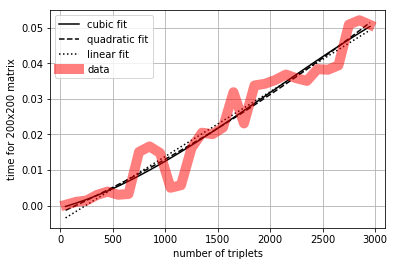

In [98]:
plot_times(n2, r2, xlabel="number of triplets", ylabel="time for 200x200 matrix")

## `__getitem__`

In [100]:
r1 = []
n1 = range(50,3000,100)
def getn(m,n):
    for i in m.rows.keys():
        for j in m.rows[i].keys():
            m[i,j]
    
for n in n1:
    print (n, end=" ")
    m = xrandom_sparse_matrix(200,200,n)
    k = %timeit -o -q -r 3 -n 3 getn(m,n)
    r1.append(k.best)

50 150 250 350 450 550 650 750 850 950 1050 1150 1250 1350 1450 1550 1650 1750 1850 1950 2050 2150 2250 2350 2450 2550 2650 2750 2850 2950 

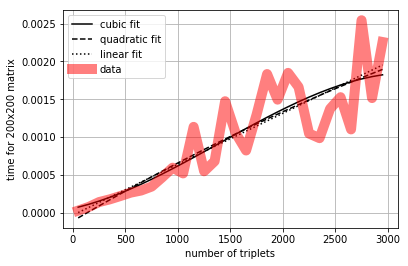

In [101]:
plot_times(n1, r1, xlabel="number of triplets", ylabel="time for 200x200 matrix")

## `__add__`

50 150 250 350 450 550 650 750 850 950 1050 1150 1250 1350 1450 1550 1650 1750 1850 1950 2050 2150 2250 2350 2450 2550 2650 2750 2850 2950 

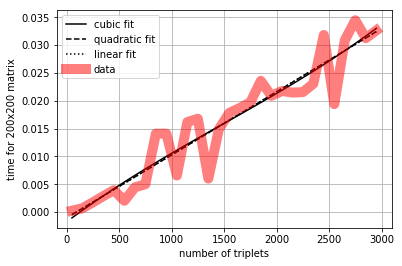

In [102]:
r3 = []
n3 = range(50,3000,100)
for n in n3:
    print (n, end=" ")
    m1 = xrandom_sparse_matrix(200,200,n)
    m2 = xrandom_sparse_matrix(200,200,n)
    m1[200,200]=1
    m2[200,200]=1
    k = %timeit -o -q -r 3 -n 3 m1+m2
    r3.append(k.best)
plot_times(n3, r3,xlabel="number of triplets", ylabel="time for 200x200 matrix")

## `dot`

50 250 450 650 850 1050 1250 1450 1650 1850 2050 2250 2450 2650 2850 

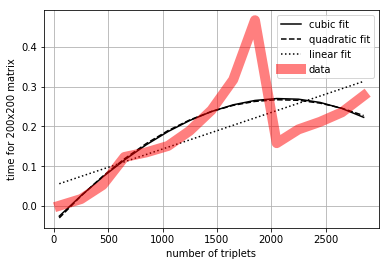

In [104]:
r4 = []
n4 = range(50,3000,200)
for n in n4:
    print (n, end=" ")
    m = xrandom_sparse_matrix(200,200,n)
    k = %timeit -o -q -r 3 -n 3 m.dot(m.T())
    r4.append(k.best)
plot_times(n4, r4,xlabel="number of triplets", ylabel="time for 200x200 matrix")